# 19 Monte Carlo methods

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numba as nb

# Excercise 1
Extend the 1D model to a 2D lattice of $10\times10$ spins (or larger if you have a good computer), where the spins can point only in the + or - $y$ direction. The system energy is the sum of all interactions between nearest neigbors on the lattice.

$$E=-J\sum_{\langle i,j\rangle}s_is_j$$
where the notation $\langle i,j\rangle$ indicates a sum over pairs $i,j$ that are adjacent on the lattice.

The goal is to show the net magnetization (and uncertainty) as a function of temperature. How does the critical temperature change?

<style>
p {
    font-size: 14pt;
    color: orange;
}
</style>

I hope you appreciate just how fast I've made this. I've used both numba and multiprocessing in order to make this much, much faster than it would otherwise be.

I did have to seperate the actual code out from the Jupyter Notebook due to issues I ran into with the ```concurrent.futures``` module.

I unfortunately did not have time to look at the extra challenge you suggested I do, but I would like to return to this assignment at a later date and implement it, as I don't think it would take too much modification. I instead spent a lot of time trying to optimize and make my code as fast as possible, which I believe worked amazingly.

<style>

h1 {
    color: blue;
    font-size: 24pt;
}

p {
    font-size: 14pt;
}
</style>

# Answer
We see that as the number of spins increases in the 2D lattice, the critical temperature increases.

In [2]:
from scripts import simulation
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [3]:
def plots(T, E_avgs, M_avgs, E_stds, M_stds):
    plt.figure(figsize=(9, 6))
    plt.errorbar(T, np.abs(M_avgs), yerr=M_stds, fmt="bo")
    plt.xlabel("Temperature", fontsize=20)
    plt.ylabel("Magnetization", fontsize=20)
    plt.show()
    plt.close()
    
    plt.figure(figsize=(9, 6))
    plt.errorbar(T, E_avgs, yerr=E_stds, fmt="bo")
    plt.xlabel("Temperature", fontsize=20)
    plt.ylabel("Energy", fontsize=20)
    plt.show()
    plt.close()
    

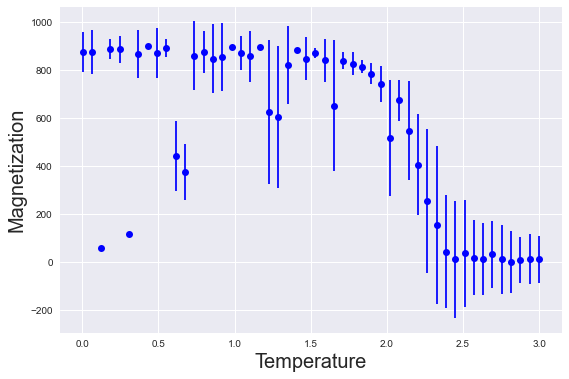

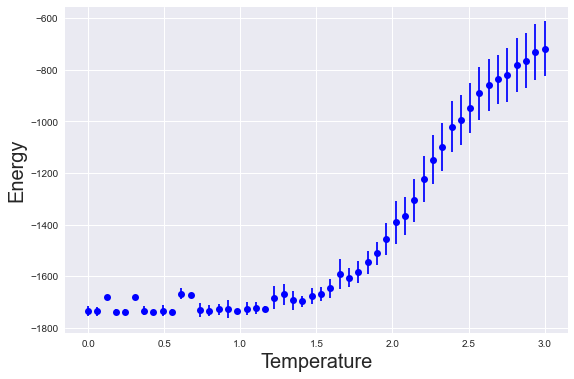

In [4]:
plots(
    *simulation(
        T0=0.001, # Lower bound of temperature
        T1=3, # Upper bound on temperature
        N_T=50, # Number of temperatures to test
        N_S=30, # Number of spins = N_S * N_S
        J=1, # Interaction energy
        iters=100, # Number of iterations
        steps=20_000, # Number of steps in each iteration
        print_steps=False, # Prints acceptance rate, energy, and magnetization at the end of each iteration
        print_status=False # Prints "T = x.xx Finished" when each process finishs its iteration
    )
)

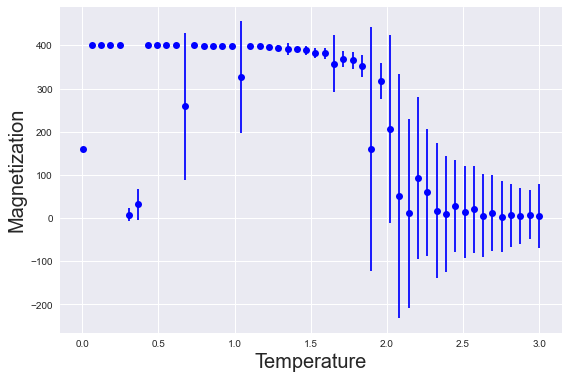

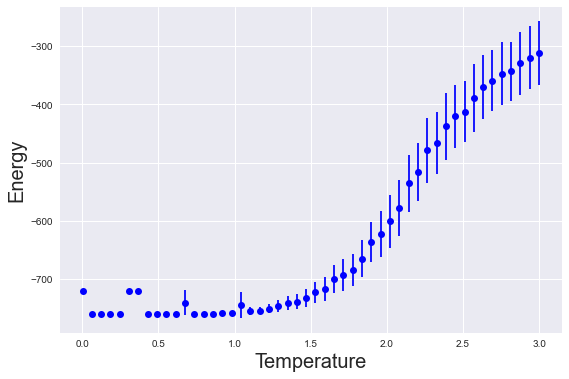

In [5]:
plots(
    *simulation(
        T0=0.001,
        T1=3,
        N_T=50,
        N_S=20,
        J=1,
        iters=100,
        steps=20_000,
        print_steps=False,
        print_status=False
    )
)


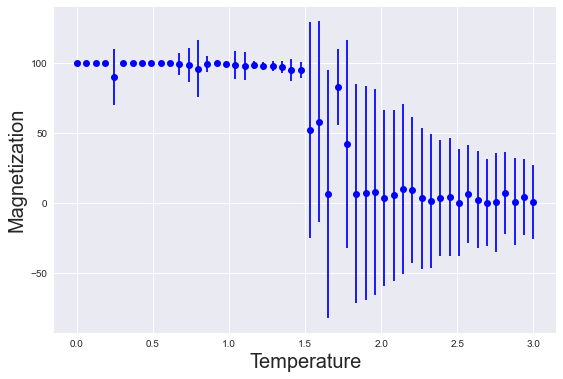

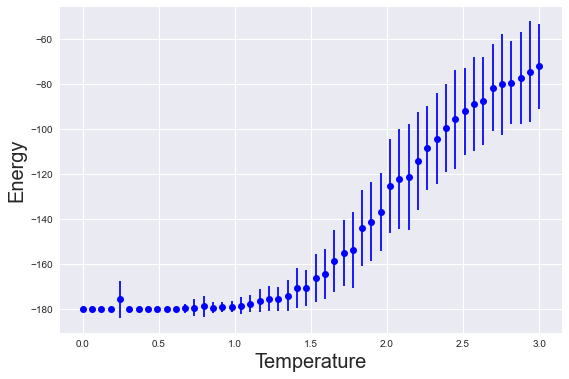

In [6]:
plots(
    *simulation(
        T0=0.001, 
        T1=3, 
        N_T=50,
        N_S=10,
        J=1,
        iters=100,
        steps=20_000,
        print_steps=False,
        print_status=False
    )
)


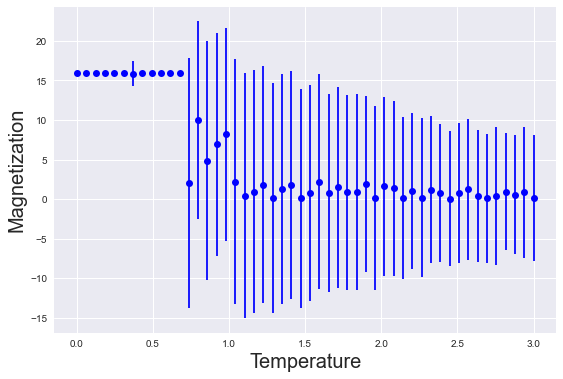

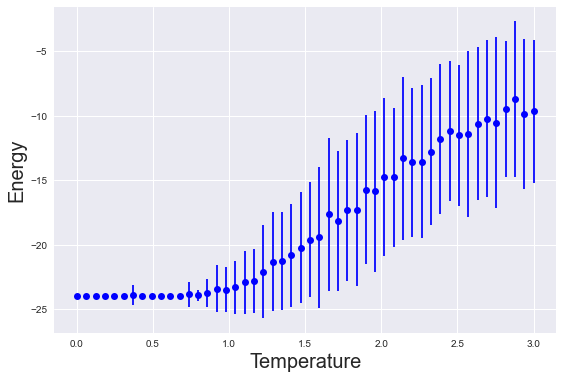

In [7]:
plots(
    *simulation(
        T0=0.001, 
        T1=3, 
        N_T=50,
        N_S=4,
        J=1,
        iters=100,
        steps=20_000,
        print_steps=False,
        print_status=False
    )
)

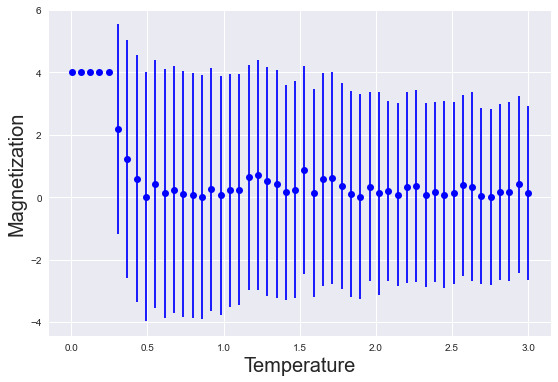

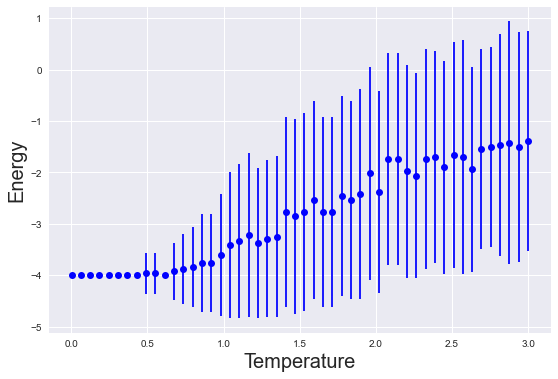

In [8]:
plots(
    *simulation(
        T0=0.001, 
        T1=3, 
        N_T=50,
        N_S=2,
        J=1,
        iters=100,
        steps=20_000,
        print_steps=False,
        print_status=False
    )
)